# Predicting Education Project Funding Status
 
**Assignment 3: Application of the Improved ML Pipeline**
    
Aya Liu  
04/28/2019

Pipeline
---
   - Data preparation  
   - Exploratory analysis  
   - Pre-processing  
   - Feature generation  
   - Model building  
   - Validation  
 

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import graphviz
import warnings
import pipeline as pp

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### I. Data Preparation

In [2]:
# Read data
file = 'data/projects_2012_2013.csv'
coltypes = {'school_ncesid': str}
parse_dates = ['date_posted', 'datefullyfunded']
df = pp.read_data(file, coltypes=coltypes, parse_dates=parse_dates)

In [3]:
# Calculate the number of days it takes for a project to get fully funded
df['time_till_funded'] = (df.datefullyfunded - df.date_posted).apply(lambda x: x.days)

# Create target variable to identify projects fully funded within 60 days of their posting dates
df['funded_wi_60d'] = np.where(df.time_till_funded <= 60, 1, 0)

In [4]:
df.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,teacher_prefix,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded,time_till_funded,funded_wi_60d
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.70993E+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,f,f,Mrs.,Mathematics,Math & Science,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,2013-04-14,2013-05-02,18,1
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,64098006751,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,f,f,Mrs.,Civics & Government,History & Civics,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,2012-04-07,2012-04-18,11,1
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,62271003143,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,f,f,Ms.,Literacy,Literacy & Language,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,2012-01-30,2012-04-15,76,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.60009E+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),f,t,Ms.,Literacy,Literacy & Language,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,2012-10-11,2012-12-05,55,1
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.60687E+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,f,f,Mrs.,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,2013-01-08,2013-03-25,76,0


In [5]:
df.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                     object
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

### II. Exploratory Analysis

Distribution of all numerical variables


,total_price_including_optional_support,students_reached
count,124976.000000,124917.000000
mean,654.011811,95.445760
std,1098.015854,163.481912
min,92.000000,1.000000
25%,345.810000,23.000000
50%,510.500000,30.000000
75%,752.960000,100.000000
max,164382.840000,12143.000000



########

Variable: total_price_including_optional_support
---
Distribution of total_price_including_optional_support grouped by funded_wi_60d


,count,mean,std,min,25%,50%,75%,max
funded_wi_60d,,,,,,,,
0,36010.0,801.572199,1217.907204,122.61,452.05,589.790,899.9225,69670.89
1,88966.0,594.285067,1039.657542,92.00,306.71,475.475,671.9900,164382.84


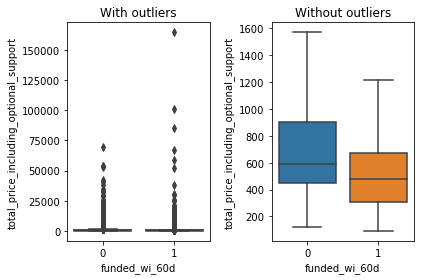

Upper outliers: % obs having total_price_including_optional_support > 1571.73125
	funded_wi_60d = 0: 0.06
	funded_wi_60d = 1: 0.03

Lower outliers: % obs having total_price_including_optional_support < -241.2100000000001
	funded_wi_60d = 0:: 0.00
	funded_wi_60d = 1:: 0.00

########

Variable: students_reached
---
Distribution of students_reached grouped by funded_wi_60d


,count,mean,std,min,25%,50%,75%,max
funded_wi_60d,,,,,,,,
0,35990.0,98.604640,160.891321,1.0,23.0,31.0,100.0,999.0
1,88927.0,94.167317,164.502419,1.0,23.0,30.0,100.0,12143.0


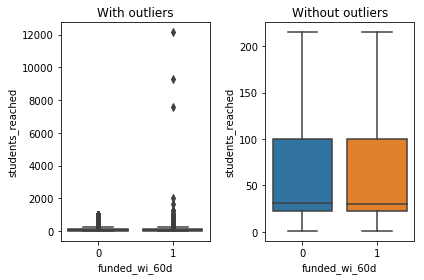

Upper outliers: % obs having students_reached > 215.5
	funded_wi_60d = 0: 0.10
	funded_wi_60d = 1: 0.09

Lower outliers: % obs having students_reached < -92.5
	funded_wi_60d = 0:: 0.00
	funded_wi_60d = 1:: 0.00

########

Number of observations by school_metro


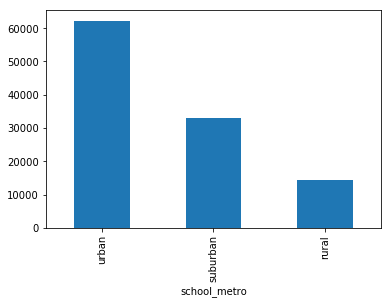

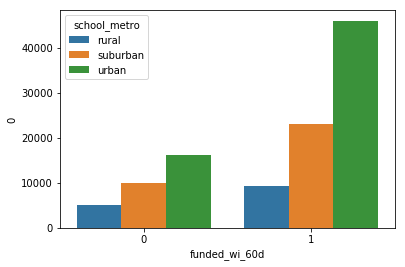


########

Number of observations by school_charter


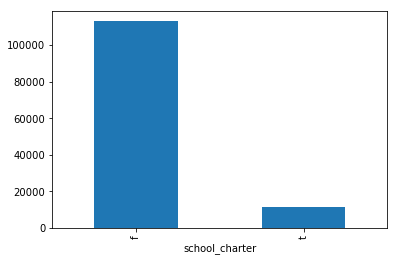

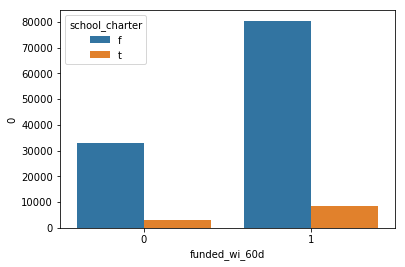


########

Number of observations by school_magnet


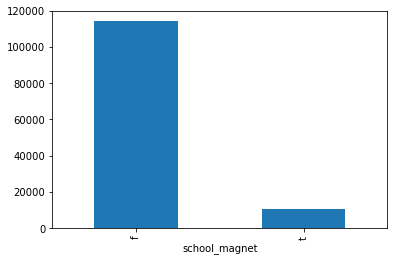

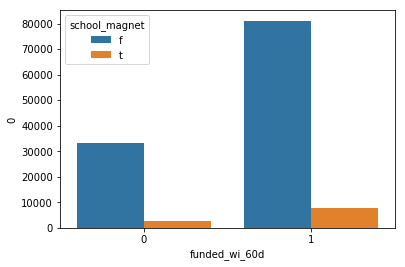


########

Number of observations by primary_focus_area


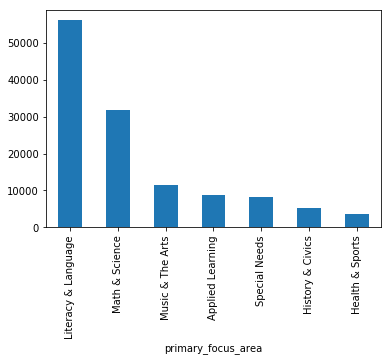

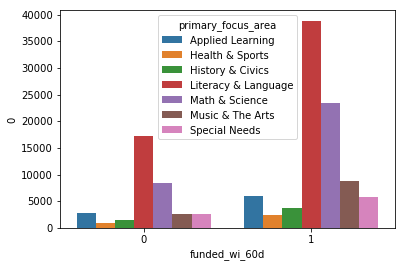


########

Number of observations by secondary_focus_area


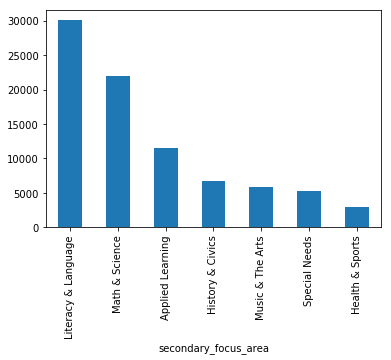

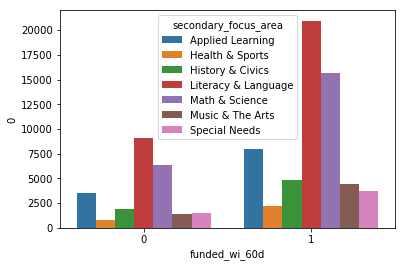


########

Number of observations by resource_type


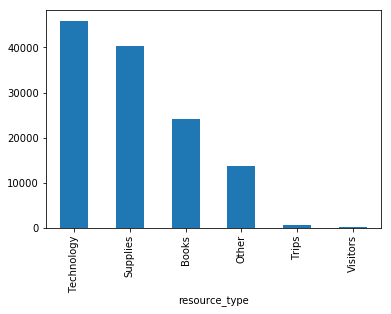

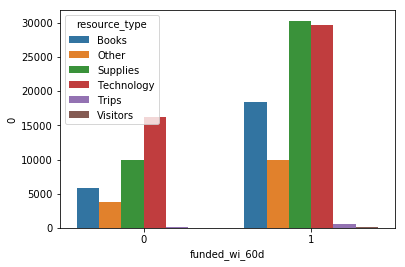


########

Number of observations by poverty_level


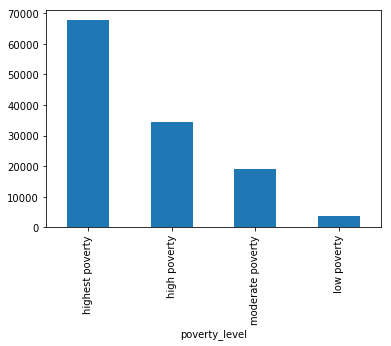

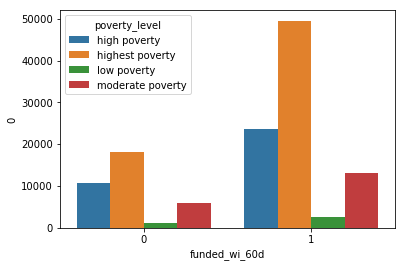


########

Number of observations by grade_level


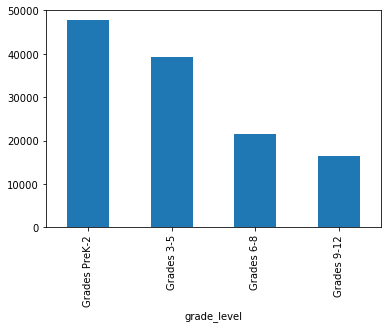

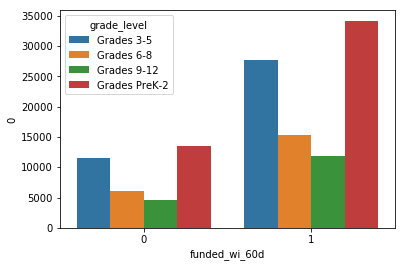


########

Number of observations by eligible_double_your_impact_match


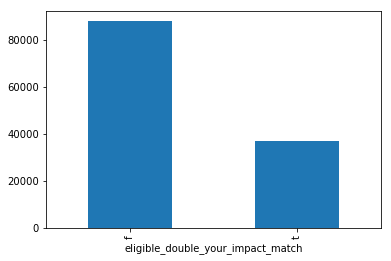

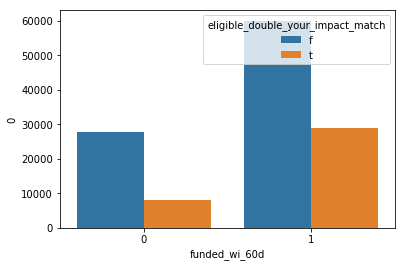

Number and percentage of missing data in each column:



,num_NA,perc_NA
school_ncesid,9233,0.073878
school_metro,15224,0.121815
school_district,172,0.001376
primary_focus_subject,15,0.000120
primary_focus_area,15,0.000120
secondary_focus_subject,40556,0.324510
secondary_focus_area,40556,0.324510
resource_type,17,0.000136
grade_level,3,0.000024
students_reached,59,0.000472


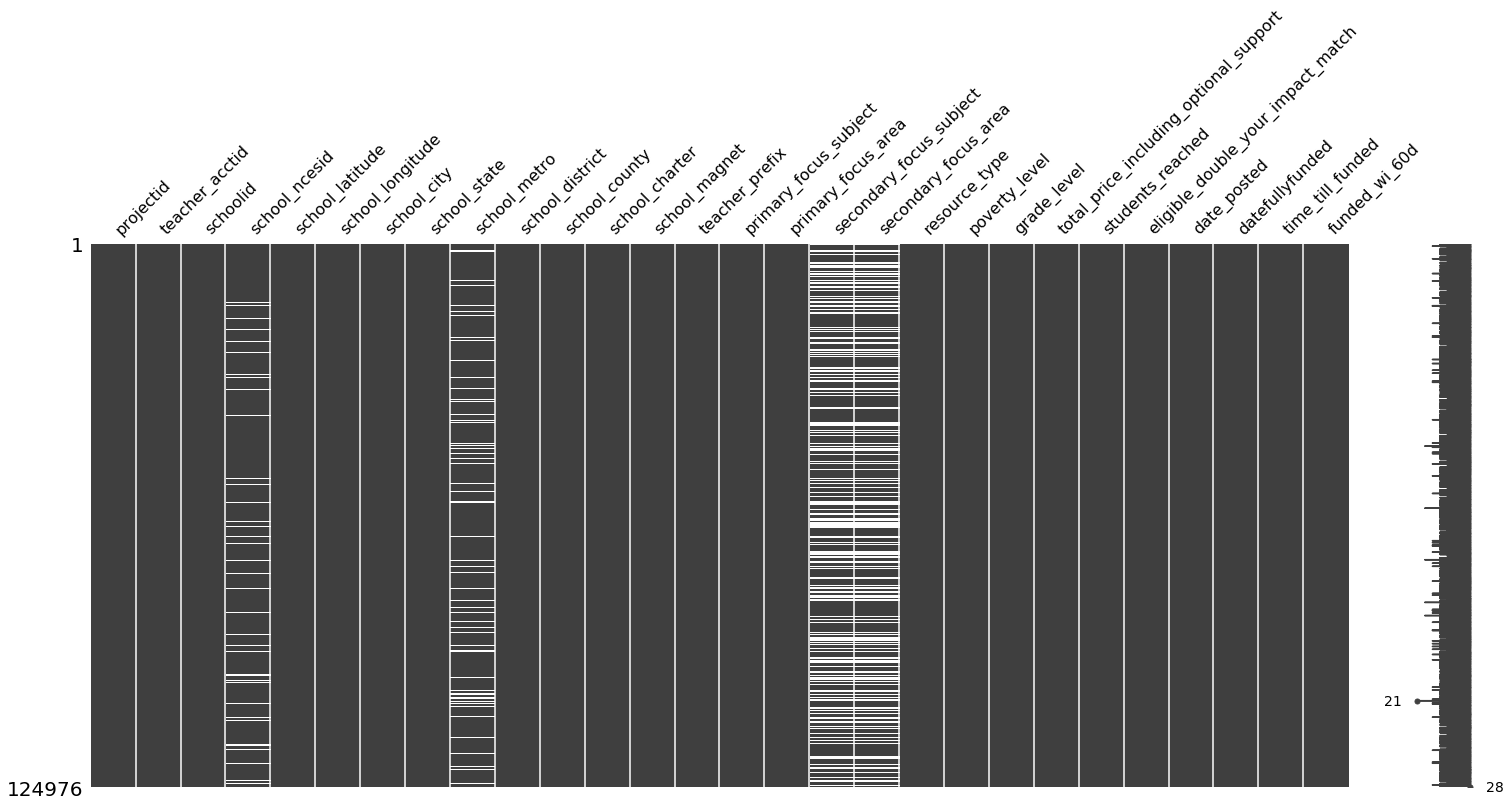

In [6]:
# Set target variable to constant
T = 'funded_wi_60d'

# Construct lists of variables to explore
num_vars = ['total_price_including_optional_support', 'students_reached']
cat_vars = ['school_metro', 'school_charter', 'school_magnet', 'primary_focus_area', 'secondary_focus_area', 
            'resource_type', 'poverty_level', 'grade_level', 'eligible_double_your_impact_match']

# Explore selected variables
pp.explore_data(T, num_vars, cat_vars, df)

### III. Pre-processing


In [7]:
cols_to_drop = ['school_district', 
                'primary_focus_subject', 
                'primary_focus_area', 
                'resource_type', 
                'grade_level', 
                'students_reached']
df.dropna(axis=0, subset=cols_to_drop, inplace=True)

### IV. Feature Generation

Variable to discretize: total price including optional support

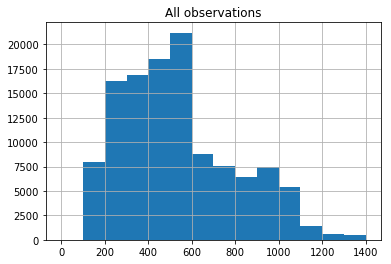

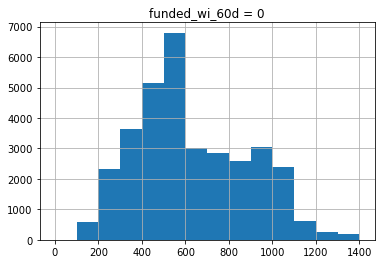

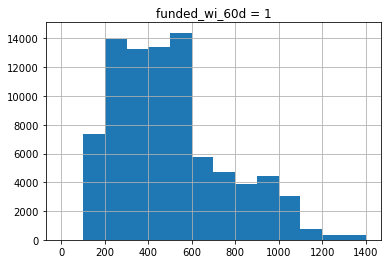

In [8]:
pp.visualize_num_distr('total_price_including_optional_support', T, data=df, bins=list(range(0, 1500, 100)))

In [9]:
# Discretize total_price_including_optional_support

bins_tp = [0, 300, 600, 900, 1200, float('inf')]
labels_tp = ['<300', '300-600', '600-900', '900-1200', '>1200']
df['total_price_cat'] = pp.discretize(varname='total_price_including_optional_support', data=df, 
                                      bins=bins_tp, labels=labels_tp)

In [10]:
# Convert selected variables to dummies

cols_to_transform = ['school_charter', 'school_magnet', 'primary_focus_area', 
                     'resource_type', 'secondary_focus_area', 'resource_type', 
                     'poverty_level', 'grade_level', 'eligible_double_your_impact_match', 
                     'total_price_cat']
dfbin = pp.convert_to_dummy(df, cols_to_transform, dummy_na=True)
dfbin.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,school_county,teacher_prefix,primary_focus_subject,secondary_focus_subject,total_price_including_optional_support,students_reached,date_posted,datefullyfunded,time_till_funded,funded_wi_60d,school_charter_f,school_charter_t,school_charter_nan,school_magnet_f,school_magnet_t,school_magnet_nan,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_area_nan,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,secondary_focus_area_nan,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_nan,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,poverty_level_nan,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,grade_level_nan,eligible_double_your_impact_match_f,eligible_double_your_impact_match_t,eligible_double_your_impact_match_nan,total_price_cat_<300,total_price_cat_300-600,total_price_cat_600-900,total_price_cat_900-1200,total_price_cat_>1200,total_price_cat_nan
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.70993E+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,Cook,Mrs.,Mathematics,Visual Arts,1498.61,31.0,2013-04-14,2013-05-02,18,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,64098006751,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,Ventura,Mrs.,Civics & Government,Literature & Writing,282.47,28.0,2012-04-07,2012-04-18,11,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,62271003143,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,Los Angeles,Ms.,Literacy,Social Sciences,1012.38,56.0,2012-01-30,2012-04-15,76,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.60009E+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,Kings (Brooklyn),Ms.,Literacy,NaN,175.33,23.0,2012-10-11,2012-12-05,55,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.60687E+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,Suffolk,Mrs.,Literacy,Literature & Writing,3591.11,150.0,2013-01-08,2013-03-25,76,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


### V. Model Buidling

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [17]:
# select a vector of features 
feat_cols = learn.get_feature_cols(T, dfbin)

# Train-test split
x_train, x_test, y_train, y_test = learn.train_test_split(T, feat_cols, dfbin, random_state=2019)

In [36]:
clf_knn = learn.construct_kNN()
pred_scores = learn.fit_and_predict(clf=clf, x_train=x_train, y_train=y_train, x_test=x_test)

In [68]:
thresholds = [x/10 for x in range(0, 11, 1)]

In [209]:
population_percent = [x/10 for x in range(0, 11, 1)]

In [262]:
def get_eval_metric(pred_scores, metrics, thresholds=None, population_percent=None):
    
    if (thresholds == None) and (population_percent == None):
            raise Exception('ValueError: must have at least thresholds or population_percent')
    elif population_percent:
            # calculate thresholds based on population percentage
            thresholds = []
            for p in population_percent:
                thresholds.append(np.percentile(pred_scores, (1-p)*100))
                
    # calcualte evaluation metrics at thresholds 
    d = {'population_percent': population_percent,'score_threshold': thresholds}
    for m in metrics:
        name = m.__name__[:-6]
        scores = []
        for k in thresholds:
            # assign classification at threshold k
            pred_label = [1 if x[1] > k else 0 for x in pred_scores]
            num_pred_1 = sum(pred_label)
            # calculate evaluation metric at threshold k
            score_at_k =  m(pred_label, y_test)
            scores.append(score_at_k)
        d[name] = scores
    results = pd.DataFrame(d)
    return results

In [225]:
np.percentile(pred_scores[:,1], 50)

0.8

In [265]:
learn.get_eval_metric(pred_scores, [accuracy_score, precision_score, recall_score], population_percent=population_percent)

TypeError: get_eval_metric() missing 1 required positional argument: 'metrics'

In [293]:
import pipeline as pp

In [296]:
pp.get_eval_metric(pred_scores, y_test, [accuracy_score, precision_score, recall_score], population_percent=population_percent)

Baseline: The true number of YES in test data is 22242/31183 (71.33%)



,population_percent,score_threshold,accuracy,precision,recall
0,0.0,1.0,0.286727,0.000000,0.000000
1,0.1,1.0,0.286727,0.000000,0.000000
2,0.2,0.8,0.434435,0.266163,0.818358
3,0.3,0.8,0.434435,0.266163,0.818358
4,0.4,0.6,0.579514,0.591763,0.765500
5,0.5,0.5,0.668185,0.836031,0.735126
6,0.6,0.4,0.668185,0.836031,0.735126
7,0.7,0.2,0.703492,0.953556,0.720855
8,0.8,0.2,0.703492,0.953556,0.720855
9,0.9,0.0,0.712536,0.993166,0.714840


In [195]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neighbors import KNeighborsClassifier as knn

In [274]:
from sklearn.model_selection import ParameterGrid

In [287]:
pg = ParameterGrid({'n_neighbors': [5, 15, 50], 'weights': [
                'distance', 'uniform']})

In [290]:
for p in pg:
    knn.set_params(**p)
    # knn.fit()
    # knn.pred_proba

### VI. Model Evaluation